In [1]:
import numpy as np
import math
import matplotlib.pylab as plt
# import pandas as pd

pi=math.acos(-1)

In [2]:
##### mk_lc function #####
def mk_lc(t0,N,dt,P1,P2,P3,A1,A2,A3):
    pi=math.acos(-1)
    t=[x * dt + t0 for x in range(N)]
    mag1=[A1*np.sin(2*pi/P1*x) for x in t]
    mag2=[A2*np.sin(2*pi/P2*x) for x in t]
    mag3=[A3*np.sin(2*pi/P3*x) for x in t]
    mag=mag1
    i=-1
    for x in range(N):
    	mag[x-1]=mag1[x-1]+mag2[x-1]+mag3[x-1]
    
    lc=[t,mag]
    return lc

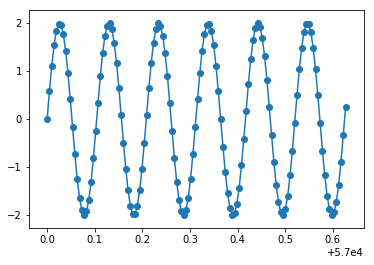

In [3]:
t0=57000
dt=7.0/60/24
N=130
P1=150.0/60/24
P2=80.0/60/24
P3=60.0/60/24
A1=2
A2=0
A3=0


lc=mk_lc(t0,N,dt,P1,P2,P3,A1,A2,A3)

t=lc[0]
mag=lc[1]
plt.plot(t, mag)
plt.scatter(t,mag)
plt.show()

In [4]:
lc1=[t,mag]
#lc=np.array([t,mag]).reshape(2,N).T
f = open('lc1.txt', 'w')
for x in lc:
    f.write(str(x) + "\n")

f.close()


In [5]:
############## PHASE ############
def phase(t,Ptmp):
    ph0=[x / Ptmp for x in t]
    ph=[x-math.floor(x) for x in ph0]
    return ph

In [6]:
f = open("./lc1.txt","r")
list = []
for x in f:
    list.append(x[1:-2].split(','))

f.close()

i=-1
for x in list[0]:
    i=i+1
    list[0][i]=float(x)

i=-1
for x in list[1]:
    i=i+1
    list[1][i]=float(x)

t=list[0]
mag=list[1]

In [7]:
# Ptrue=150.0/60/25
Ptmp=147/60/24
ph=phase(t,Ptmp)

In [8]:
### plot ###
# plt.plot(lc_ph[0], lc_ph[2])
# plt.scatter(lc_ph[0],lc_ph[2])
# plt.show()


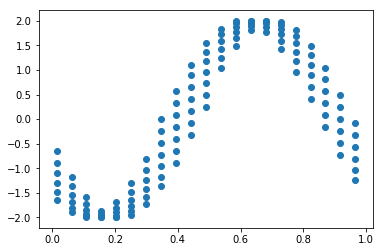

In [9]:
plt.scatter(ph,mag)
plt.show()

##this is only for one period... but we want to try this in a range of periods

In [10]:
#make a phased light curve with a period of Ptmp

Ptmp1 = range(60,300)

Total = []

for i in Ptmp1:
    ph0=[x / (i/60/24) for x in t]
    ph=[x-math.floor(x) for x in ph0]
    #ph=phase(t,Ptmp)  ## temporal period
    #Extract points from phase 0.05 to 0.1
    bin_step=0.01
    bin_size=0.5
    #bin_num= np.linspace(0,1,21)
    bin_n=(1-bin_size)/bin_step+1
    ph1=[0+x*bin_step for x in range(int(bin_n))]
    #print(ph1)
    ph=np.array(ph)
    mag=np.array(mag)
    
    def Var_each_bin(x):
        index_bin = np.where((ph > x) & (ph < x+bin_size))
        ph_bin=ph[index_bin]
        mag_bin=mag[index_bin]
        var_bin=np.var(mag_bin)
        return (var_bin)
    var_all=[]
    for x in ph1:
        var_all.append(Var_each_bin(x))

    #return(sum(var_all))
    Total.append(sum(var_all))

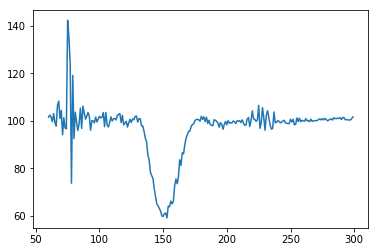

In [11]:
plt.plot(Ptmp1,Total)
plt.show()

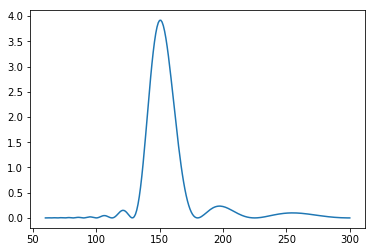

In [12]:
P1=60
P2=300
dP=0.5

Ptmp = []
bins = np.linspace(60,300,241)
for i in bins:
    Ptmp.append(i)

# # N_Pbin=(P2-P1)/dP+1
# # Ptmp=[P1+x*dP for x in range(N_Pbin)]

pw=[]
for j in Ptmp:
    a=2.0*sum([x[1] * np.cos((2*pi/(j/60/24))*x[0]) for x in np.array(lc1).T])/N
    b=2.0*sum([x[1] * np.sin((2*pi/(j/60/24))*x[0]) for x in np.array(lc1).T])/N
    pw.append(a*a+b*b)

plt.plot(Ptmp,pw)
plt.show()

In [13]:
A=[]
for j in Ptmp:
    A.append(2.0*sum([x[1] * np.cos(2*pi/(j/60/24)*x[0]) for x in np.array(lc1).T])/N)